# Working with RASMI dataset
Here I demonstrate the rasmi_lca package.
- importing and querying the raw RASMI kg/m2 data
- linking it to LCA factors from Ecoinvent or any other desired LCA dataset
- performing bootstrapped MC sampling of emissions

In [1]:
# import normal package suite
import pandas as pd
import numpy as np

#Matplotlib setup
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib as mpl
import matplotlib.ticker as mtick

## Import and initialize
importing the package

In [2]:
from rasmi_lca_v1 import *

Set the following paths when initializing the function (otherwise, the object will default to the package filepath structure)
- RASMI data excel file
- lca data excel file

In [3]:
rlca = RasmiLCA(rasmi_path='', factors_path='')

importing RASMI dataset...
   concrete ...
   brick ...
   wood ...
   steel ...
   glass ...
   plastics ...
   aluminum ...
   copper ...
importing Ecoinvent factor dataset...
   concrete ...
   brick ...
   wood ...
   steel ...
   glass ...
   plastics ...
   aluminum ...
   copper ...


The dataset and associated metadata is stored in the "rasmi" variable (and emission factors in the "efacs" variable) and can be accessed using dictionary keys

In [4]:
print(rlca.rasmi.keys())
print(rlca.rasmi['structures'])

dict_keys(['concrete', 'brick', 'wood', 'steel', 'glass', 'plastics', 'aluminum', 'copper', 'functions', 'structures', 'geos', 'mats'])
Index(['C', 'M', 'S', 'T'], dtype='object')


## Query RASMI and emission factors
query the imported data. Queries use the same data structure as the original RASMI datast for example:
- we get the materials for residential single buildings ("RS"), using timber structures ("T"), in Canada ("OECD_CAN").

In [5]:
ras_can = rlca.query_rasmi('RS','T','OECD_CAN')

emission factor querying is similar, but we only pass the region
- we get the emission factors for material's in Canadian buildings

In [6]:
efacs_can = rlca.query_efacs('OECD_CAN')

## Sampling
two functions exist to perform Monte Carlo sampling on 1) the RASMI material intensities, and 2) the emission factors. There is then a composite function that combines these two samples into an emissions per m2 calculation. The composite sampler is demonstrated below. <br> <br>

Note that the random seed and sample size are set using class variables `self.n` and `self.seed`. This makes it easy to perform many experiments at once; for example, if you would like to generate 100 samples for one region and 1000 samples for another, simply create two `RASMI_LCA()` objects and run the sampling function. The sampler returns impacts per m2. The unit of impact is determined in the excel data file. The base file uses GWP100 using the IPCC2021 impact model (in kgCO2e), though the file can be modified to include any desired LCA impact categories.

In [7]:
# sample parameters
rlca.n = 10
rlca.seed = 1234

# sample
can_samples_test = rlca.sample_and_calc('RS','T','OECD_CAN')
can_samples_test

array([223.46873407, 135.64443049, 122.25613563,  91.60050895,
       100.13575113, 163.12168532, 500.99058705, 237.50830027,
       170.12273656, 135.71815232])

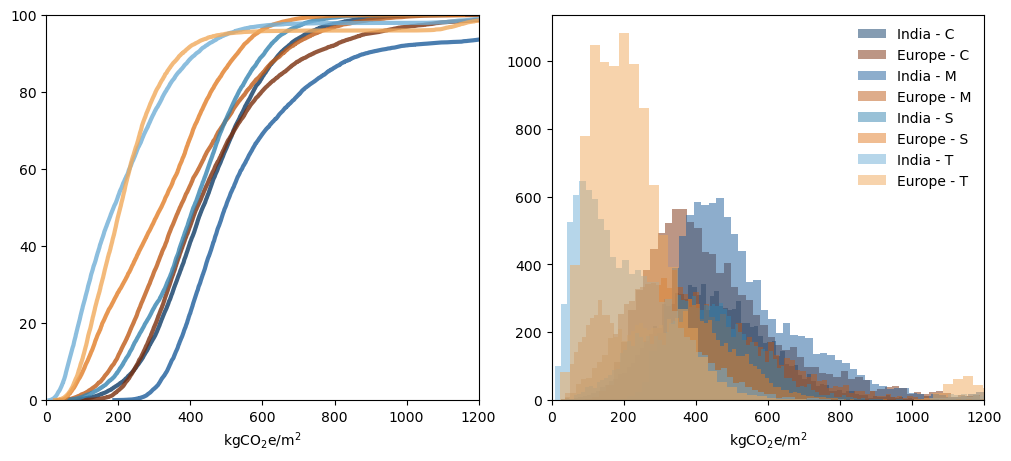

In [ ]:
# example: compare sampled emissions in EU vs. India residential multi-unit for each structural material
rlca.n = 10000
rlca.seed = 100

fig, ax = plt.subplots(1, 2, figsize=(10,4.5), constrained_layout=True)
clrs = ['#0D3B66', '#1D5D9B', '#3584B1', '#6FAED6']
clrs2 = ['#7A2E0C', '#BF5A17', '#E27D27', '#F1A95A']

for i, s in enumerate(rlca.rasmi['structures']):
    # compare multi unit buildings across different geographies
    a = rlca.sample_and_calc('RM', s,'ASIA_IND')
    b = rlca.sample_and_calc('RM', s,'OECD_EEU')

    ax[0].plot(np.sort(a), np.linspace(0, 1, len(a), endpoint=False)*100, linewidth=3, alpha=0.8, color=clrs[i], label='India - '+ s)
    ax[0].plot(np.sort(b), np.linspace(0, 1, len(b), endpoint=False)*100, linewidth=3, alpha=0.8, color=clrs2[i], label='Europe - '+ s)

    ax[1].hist(a, linewidth=0, alpha=0.5, color=clrs[i], bins=100, label='India - '+ s)
    ax[1].hist(b, linewidth=0, alpha=0.5, color=clrs2[i], bins=100, label='Europe - '+ s)

ax[0].set(xlim=[0,1200], ylim=[0,100], xlabel='kgCO$_2$e/m$^2$')
ax[1].set(xlim=[0,1200], xlabel='kgCO$_2$e/m$^2$')
ax[1].legend(frameon=False)